In [1]:
import pandas as pd
X = pd.read_csv(r'./cocktail/tfidf/tfidf_min0.005_pos_matrix_0824.csv', encoding='utf-8')
X = X.drop(['Unnamed: 0'], axis=1)

print(X.shape)

In [2]:
from sklearn import preprocessing

'''
preprocessing.scale()是按照列进行标准化计算，计算公式为:
(X_train[:,0]-X_train[:,0].mean())/X_train[:,0].std()
(X_train[:,0]-np.mean(X_train[:,0]))/np.std(X_train[:,0])//或者
'''
X_scaled = preprocessing.scale(X)  # scale操作之后的数据零均值，单位方差（方差为1）
print(X_scaled)
print('#-----------------------------------')

[[-0.08584541 -0.11406369 -0.08794423 ... -0.08755367 -0.20379691
  -0.08990736]
 [-0.08584541 -0.11406369 -0.08794423 ... -0.08755367 -0.20379691
  -0.08990736]
 [-0.08584541 -0.11406369 -0.08794423 ... -0.08755367 -0.20379691
  -0.08990736]
 ...
 [-0.08584541 -0.11406369 -0.08794423 ... -0.08755367 -0.20379691
  -0.08990736]
 [-0.08584541 -0.11406369 -0.08794423 ... -0.08755367 -0.20379691
  -0.08990736]
 [-0.08584541  5.58089608 -0.08794423 ... -0.08755367 -0.20379691
  -0.08990736]]
#-----------------------------------


In [3]:
 # 进行PCA数据降维
from sklearn.decomposition import PCA
#
# # 生成PCA实例
pca = PCA(n_components=3)  # 把维度降至3维

# # 进行PCA降维
X_pca = pca.fit_transform(X_scaled)
# print(X_pca.explained_variance_r)
print(X_pca)
# # 生成降维后的dataframe
X_pca_frame = pd.DataFrame(X_pca, columns=['pca_1', 'pca_2', 'pca_3'])  # 原始数据由(30000, 7)降维至(30000, 3)
print(X_pca_frame)
# # 训练简单模型
from sklearn.cluster import KMeans
# # KMeans算法实例化，将其设置为K=10
est = KMeans(n_clusters=9)
# # 作用到降维后的数据上
est.fit(X_pca)

kmean = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

[[-0.50819854 -0.08017541 -0.01006192]
 [ 2.67235298 -2.25078419 -3.45473681]
 [ 1.49646499 -5.26319729 -2.08250059]
 ...
 [-0.50819854 -0.08017541 -0.01006192]
 [-0.50819854 -0.08017541 -0.01006192]
 [ 5.44871745 -3.39803909 -0.11205885]]
          pca_1     pca_2     pca_3
0     -0.508199 -0.080175 -0.010062
1      2.672353 -2.250784 -3.454737
2      1.496465 -5.263197 -2.082501
3      2.956408 -0.778812  1.408655
4     -0.508199 -0.080175 -0.010062
...         ...       ...       ...
22481  1.275219 -0.433216 -1.322497
22482 -0.508199 -0.080175 -0.010062
22483 -0.508199 -0.080175 -0.010062
22484 -0.508199 -0.080175 -0.010062
22485  5.448717 -3.398039 -0.112059

[22486 rows x 3 columns]


In [4]:

# # 取出聚类后的标签
kmeans_clustering_labels = pd.DataFrame(est.labels_, columns=['cluster'])  # 0-9,一共10个标签
print(kmeans_clustering_labels)
# # 生成有聚类后的dataframe
X_pca_frame = pd.concat([X_pca_frame, kmeans_clustering_labels], axis=1)
print(X_pca_frame)
#

       cluster
0            0
1            3
2            7
3            6
4            0
...        ...
22481        0
22482        0
22483        0
22484        0
22485        7

[22486 rows x 1 columns]
          pca_1     pca_2     pca_3  cluster
0     -0.508199 -0.080175 -0.010062        0
1      2.672353 -2.250784 -3.454737        3
2      1.496465 -5.263197 -2.082501        7
3      2.956408 -0.778812  1.408655        6
4     -0.508199 -0.080175 -0.010062        0
...         ...       ...       ...      ...
22481  1.275219 -0.433216 -1.322497        0
22482 -0.508199 -0.080175 -0.010062        0
22483 -0.508199 -0.080175 -0.010062        0
22484 -0.508199 -0.080175 -0.010062        0
22485  5.448717 -3.398039 -0.112059        7

[22486 rows x 4 columns]


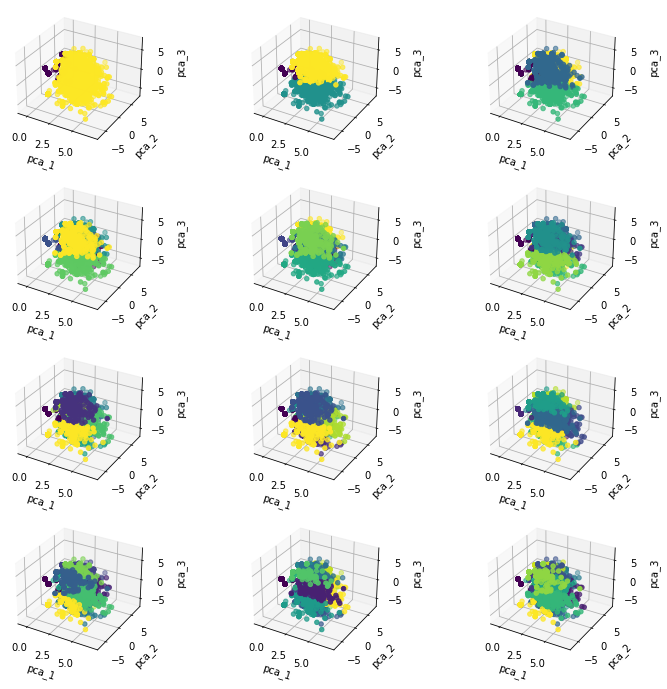

In [5]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D  # 绘制3D图形
from sklearn import metrics
import matplotlib.pyplot as plt
# KMeans算法实例化，将其设置为K=range(2, 14)
d = {}
fig_reduced_data = plt.figure(figsize=(12, 12))
# # 画图之前首先设置figure对象，此函数相当于设置一块自定义大小的画布，
# # 使得后面的图形输出在这块规定了大小的画布上，其中参数figsize设置画布大小
for k in range(2, 14):
    est = KMeans(n_clusters=k, random_state=111)
# #     # 作用到降维后的数据上
    y_pred = est.fit_predict(X_pca)
#     print(y_pred)
#     # 评估不同k值聚类算法效果
    calinski_harabaz_score = metrics.calinski_harabasz_score(X_pca_frame, y_pred)
#     print(calinski_harabaz_score)
# # # X_pca_frame：表示要聚类的样本数据，一般形如（samples，features）的格式。
# #     # y_pred：即聚类之后得到的label标签，形如（samples，）的格式
    d.update({k: calinski_harabaz_score})
    # print(d)
#     print('calinski_harabaz_score with k={0} is {1}'.format(k, calinski_harabaz_score))
# #     # CH score的数值越大越好
# #     # 生成三维图形，每个样本点的坐标分别是三个主成分的值
    ax = plt.subplot(4, 3, k - 1,projection='3d')
# #     # 将figure设置的画布大小分成几个部分，表示4(row)x3(colu),即将画布分成4x3，四行三列的12块区域，
# #     # k-1表示选择图形输出的区域在第k-1块，图形输出区域参数必须在“行x列”范围
    ax.scatter(X_pca_frame.pca_1, X_pca_frame.pca_2, X_pca_frame.pca_3, c=y_pred)  # pca_1、pca_2、pca_3为输入数据，c表示颜色序列
    ax.set_xlabel('pca_1')
    ax.set_ylabel('pca_2')
    ax.set_zlabel('pca_3')
plt.show()


[2]
[19237.44998618668]
[2, 3]
[19237.44998618668, 18382.20735293552]
[2, 3, 4]
[19237.44998618668, 18382.20735293552, 19891.963131838376]
[2, 3, 4, 5]
[19237.44998618668, 18382.20735293552, 19891.963131838376, 18800.639830685846]
[2, 3, 4, 5, 6]
[19237.44998618668, 18382.20735293552, 19891.963131838376, 18800.639830685846, 18625.12336899009]
[2, 3, 4, 5, 6, 7]
[19237.44998618668, 18382.20735293552, 19891.963131838376, 18800.639830685846, 18625.12336899009, 19334.468281735793]
[2, 3, 4, 5, 6, 7, 8]
[19237.44998618668, 18382.20735293552, 19891.963131838376, 18800.639830685846, 18625.12336899009, 19334.468281735793, 25386.622205616488]
[2, 3, 4, 5, 6, 7, 8, 9]
[19237.44998618668, 18382.20735293552, 19891.963131838376, 18800.639830685846, 18625.12336899009, 19334.468281735793, 25386.622205616488, 35031.13905551849]
[2, 3, 4, 5, 6, 7, 8, 9, 10]
[19237.44998618668, 18382.20735293552, 19891.963131838376, 18800.639830685846, 18625.12336899009, 19334.468281735793, 25386.622205616488, 35031.139

Text(0, 0.5, 'calinski_harabaz_score')

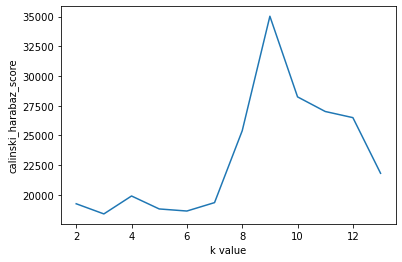

In [6]:
x = []
y = []
for k, score in d.items():
    x.append(k)
    y.append(score)
    print(x)
    print(y)
plt.plot(x, y)
plt.xlabel('k value')
plt.ylabel('calinski_harabaz_score')


In [7]:
X.index = X_pca_frame.index  # 返回：RangeIndex(start=0, stop=30000, step=1)

# 合并原数据和三个主成分的数据
X_full = pd.concat([X, X_pca_frame], axis=1)

X_full.head()

,balanced,bitter,bittersweet,classic,delicious,different,dry,fresh,fruity,herbal,...,simple,sour,strong,subtle,sweet,white,pca_1,pca_2,pca_3,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,-0.508199,-0.080175,-0.010062,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,2.672353,-2.250784,-3.454737,3
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,1.496465,-5.263197,-2.082501,7
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.556055,0.0,0.0,0.831145,0.0,2.956408,-0.778812,1.408655,6
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,-0.508199,-0.080175,-0.010062,0


In [8]:
grouped = X_full.groupby('cluster')

result_data = pd.DataFrame()
for name, group in grouped:
        # 每组未去除异常值后的个数
    print('Group:{0}, Samples before:{1}'.format(name, group['pca_1'].count()))


    desp = group[['pca_1', 'pca_2', 'pca_3']].describe()  # 返回每组的数量、均值、标准差、最小值、最大值等数据
    print(desp)

    for att in ['pca_1', 'pca_2', 'pca_3']:
        # 去异常值：箱形图
        lower25 = desp.loc['25%', att]
        upper75 = desp.loc['75%', att]
        IQR = upper75 - lower25
        min_value = lower25 - 1.5 * IQR
        max_value = upper75 + 1.5 * IQR
        # 使用统计中的1.5*IQR法则，删除每个聚类中的噪音和异常点
        group = group[(group[att] > min_value) & (group[att] < max_value)]
    result_data = pd.concat([result_data, group], axis=0)


    # 每组去除异常值后的个数
    print('Group:{0}, Samples after:{1}'.format(name, group['pca_1'].count()))
print('Remain sample:', result_data['pca_1'].count())

Group:0, Samples before:18494
              pca_1         pca_2         pca_3
count  18494.000000  18494.000000  18494.000000
mean      -0.493479     -0.082825     -0.027065
std        0.141760      0.039553      0.136616
min       -0.508199     -1.351257     -1.624726
25%       -0.508199     -0.080175     -0.010062
50%       -0.508199     -0.080175     -0.010062
75%       -0.508199     -0.080175     -0.010062
max        1.468930      0.899339     -0.010062
Group:0, Samples after:0
Group:1, Samples before:1000
             pca_1        pca_2        pca_3
count  1000.000000  1000.000000  1000.000000
mean      1.645617     0.710130     0.939895
std       0.783126     0.531575     0.712907
min       0.398755    -1.685360    -0.560056
25%       0.796150     0.360111     0.321441
50%       1.882842     0.487349     0.617894
75%       2.174183     1.438766     1.795089
max       3.966264     2.277741     3.653517
Group:1, Samples after:998
Group:2, Samples before:474
            pca_1       

In [9]:
   # 原始数据降维后的可视化
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
 
# 生成三维图形，每个样本点的坐标分别是三个主成分的值
fig_reduced_data = plt.figure()
ax_reduced_data = plt.subplot(111, projection='3d')
ax_reduced_data.scatter(X_pca_frame.pca_1.values, X_pca_frame.pca_2.values, X_pca_frame.pca_3.values)
ax_reduced_data.set_xlabel('Component_1')
ax_reduced_data.set_ylabel('Component_2')
ax_reduced_data.set_zlabel('Component_3')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Component_3')

<IPython.core.display.Javascript object>

In [10]:
# 设置每个簇对应的颜色
%matplotlib notebook
cluster_2_color = {0: 'red', 1: 'green', 2: 'blue', 3: 'yellow', 4: 'cyan', 5: 'black', 6: 'magenta', 7: '#fff0f5',
                   8: '#ffdab9', 9: '#ffa500',10:'#9F88FF',11:'#00DD00',12:'#E63F00'}

colors_clustered_data = X_pca_frame.cluster.map(cluster_2_color)  # 簇名和颜色映射
fig_reduced_data = plt.figure()
ax_clustered_data = plt.subplot(111, projection='3d')
 
# 聚类算法之后的不同簇数据的映射为不同颜色
ax_clustered_data.scatter(X_pca_frame.pca_1.values, X_pca_frame.pca_2.values, X_pca_frame.pca_3.values,
                          c=colors_clustered_data)
ax_clustered_data.set_xlabel('Component_1')
ax_clustered_data.set_ylabel('Component_2')
ax_clustered_data.set_zlabel('Component_3')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Component_3')

In [11]:
# 筛选后的数据聚类可视化
%matplotlib notebook
colors_filtered_data = result_data.cluster.map(cluster_2_color)
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(result_data.pca_1.values, result_data.pca_2.values, result_data.pca_3.values, c=colors_filtered_data)
ax.set_xlabel('Component_1')
ax.set_ylabel('Component_2')
ax.set_zlabel('Component_3')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Component_3')

In [12]:

# 查看各族中的特徵情况
monthly_Fare = result_data.groupby('cluster').describe().loc[:, u'sweet']
# monthly_Fare = result_data.groupby('cluster').describe().loc[:, ]
monthly_Fare

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
1,998.0,0.403443,0.463848,0.0,0.0,0.0,1.000000,1.000000
2,317.0,0.008774,0.060422,0.0,0.0,0.0,0.000000,0.475903
3,423.0,0.063281,0.169370,0.0,0.0,0.0,0.000000,0.842291
4,598.0,0.053389,0.166776,0.0,0.0,0.0,0.000000,0.845149
5,534.0,0.101669,0.221781,0.0,0.0,0.0,0.000000,0.837493
6,370.0,0.251175,0.318477,0.0,0.0,0.0,0.483723,0.935736
7,289.0,0.101507,0.211444,0.0,0.0,0.0,0.000000,0.824852
8,97.0,0.023798,0.115348,0.0,0.0,0.0,0.000000,0.577111


In [13]:
# mean：均值；std：标准差
monthly_Fare[['mean', 'std']].plot(kind='bar', rot=0, legend=True)  # rot可以控制轴标签的旋转度数。legend是否在图上显示图例

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='cluster'>

In [14]:
# 查看各族中的bitter情况
access_time = result_data.groupby('cluster').describe().loc[:, u'bitter']
access_time

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
1,998.0,0.001037,0.023334,0.0,0.0,0.000000,0.000000,0.581385
2,317.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3,423.0,0.036961,0.150249,0.0,0.0,0.000000,0.000000,0.825474
4,598.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
5,534.0,0.005594,0.058095,0.0,0.0,0.000000,0.000000,0.673075
6,370.0,0.132564,0.236506,0.0,0.0,0.000000,0.222208,0.873627
7,289.0,0.450205,0.452343,0.0,0.0,0.507953,1.000000,1.000000
8,97.0,0.004841,0.047678,0.0,0.0,0.000000,0.000000,0.469577


In [15]:
access_time[['mean', 'std']].plot(kind='bar', rot=0, legend=True, title='bitter')

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'bitter'}, xlabel='cluster'>

In [16]:
# 查看各族中的sweet情况
arrearage = result_data.groupby('cluster').describe().loc[:, u'sweet']
arrearage[['mean', 'std']].plot(kind='bar', rot=0, legend=True, title='Arrearage')

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Arrearage'}, xlabel='cluster'>